# M2177.003100 Deep Learning <br> Assignment #4 Implementing Conditional Generative Adversarial Nets - part2 MNIST data

Copyright (C) Data Science Laboratory, Seoul National University. This material is for educational uses only. Some contents are based on the material provided by other paper/book authors and may be copyrighted by them. Written by Jaeyoon Yoo, November 2017

In this notebook, you will learn how to implement conditional Genverative Adversarial Nets (cGANs) <br>
The goal here is to build GANs that draw a digit(MNIST data) given its label. <br> 

**Note**: certain details are missing or ambiguous on purpose, in order to test your knowledge on the related materials. However, if you really feel that something essential is missing and cannot proceed to the next step, then contact the teaching staff with clear description of your problem.

### Submitting your work:
<font color=red>**DO NOT clear the final outputs**</font> so that TAs can grade both your code and results.  
Once you have done **all parts**, run the *CollectSubmission.sh* script with your **Team number** as input argument. <br>
This will produce a zipped file called *[Your team number].zip*. Please submit this file on ETL. &nbsp;&nbsp; (Usage: ./*CollectSubmission.sh* &nbsp; Team_#)

### Some helpful tutorials and references for assignment #2:
- [1] TensorFlow official tutorials. [[link]](https://www.tensorflow.org/get_started/get_started)
- [2] Stanford CS231n lectures. [[link]](http://cs231n.stanford.edu/)
- [3] Goodfellow, Ian, et al. "Generative adversarial nets." Advances in neural information processing systems. 2014.
- [4] Mirza, Mehdi, and Simon Osindero. "Conditional generative adversarial nets." arXiv preprint arXiv:1411.1784 (2014).
- [5] Radford, Alec, Luke Metz, and Soumith Chintala. "Unsupervised representation learning with deep convolutional generative adversarial networks." arXiv preprint arXiv:1511.06434 (2015).

## 0. Download and load MNIST datasets
The MNIST datasets will be downloaded into the 'data' directory. If you want to change the directory the data is saved in, change mnist_data_dir with where you want. <br>

In [1]:
from download import *
import os
from utils import load_mnist
mnist_data_dir = './data'
prepare_data_dir(mnist_data_dir)
download_mnist(mnist_data_dir)
data_array , data_y = load_mnist(os.path.join(mnist_data_dir,'mnist'))
print(data_array.shape)
print(data_y.shape)

Found MNIST - skip
(70000, 28, 28, 1)
(70000, 10)


## <a name="1"></a> 1. Build a network

In this section, you will implement neural networks for (1) generative model to draw a digit (2) discriminative model to distinguish real image from generated image. You can use some function in *ops.py* or you can make it as you want. Just write the code in whatever way you find most clear.

In [2]:
from ops import conv2d
from ops import lrelu
from ops import de_conv
from ops import fully_connect
from ops import conv_cond_concat
from ops import batch_normal

import tensorflow as tf
import numpy as np

It is time for a generative model. It takes batch size, sample size(the dimension of latent variable or so called *noise*), y_dim(the dimension of label), the output size(should be 28 here) and z,y (Tensorflow Variables for latent variable and label respectively). It should return the image 28x28 output of which each element is in [0,1]. Note that you should define Tensorflow Variables within the variable scope.

You should utilize the label variable y in your model. The simplest way is concatenate the label variable and features or raw image.

In [3]:
def gern_net(batch_size, z , y , sample_size, y_dim, output_size):
    with tf.variable_scope('gen'):
        #### TODO ####
        w_init = tf.contrib.layers.xavier_initializer()
        # concat latent variables and the label
        cat1 = tf.concat([z, y], 1)

        dense1 = tf.layers.dense(cat1, 512, kernel_initializer=w_init)
        lrelu1 = lrelu(dense1, 0.2)

        out_dim = output_size * output_size
        dense2 = tf.layers.dense(lrelu1, out_dim, kernel_initializer=w_init)
        o = tf.nn.tanh(dense2)

        return tf.reshape(o, [-1, output_size, output_size, 1])



Now, it's time for a discriminative model. It takes image data and label variable y. It should return the value for which the model is certain that the image is real and its logit. (i.e return the value in [0,1] and its logit). Note that you should define Tensorflow Variables within the variable scope again.

You may use the label variable or not. Here, again concatenating is the simplest way to utilize it.

In [8]:
def dis_net(image_data , y, reuse=False):
    with tf.variable_scope('dis',reuse=reuse):
        #### TODO ####
        w_init = tf.contrib.layers.xavier_initializer()
        # concat input image and the label
        cat1 = tf.concat([tf.contrib.layers.flatten(image_data), y], 1)

        dense1 = tf.layers.dense(cat1, 512, kernel_initializer=w_init)
        lrelu1 = lrelu(dense1, 0.2)

        logits = tf.layers.dense(lrelu1, 1, kernel_initializer=w_init)
        prob = tf.nn.sigmoid(logits)

        return prob, logits
    #### TODO ####


## <a name="2"></a> 2. Build a main part and train it

In this section, you will implement the main part. You should define the loss function for each model(TODO part). Then run the code and check the model draws a digit for given label.

When you are done, run the following to check your implementations.

Following code will make 'samples_for_test' directory that resulting image will be saved in. You can change the directory as you want.

Also, you can change all other hyperparameters such as learning rate, batch size. But be sure to define **batch size bigger than 100**.

In [9]:
from utils import load_mnist
from utils import save_images
from utils import vis_square
from utils import sample_label
from utils import getNext_batch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os

learning_rate = 0.0002
batch_size = 128
EPOCH = 100
loss_step    = 50
display_step = 50
sample_size = 100
y_dim = 10
channel = 1
output_size = 28
sample_dir = 'samples_for_test'

if os.path.exists(sample_dir) == False:
    os.makedirs(sample_dir)

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Define the loss function in the TODO part. Modify only loss part.

Discriminator loss : log[D(x)] + log[1-D(G(z))]
Generator loss     : log[D(G(z)]

If you write the code correctly and run the code, it will display 10x10 images(each row shows one of the number). 

Also, it will save the generated images in the 'sample_dir' directory. So if you want to see it, check that directory.

**Please be sure that you ran the above codes**.

EPOCH 0 step 50: D: loss = 1.3490989 G: loss=0.5245826 
EPOCH 0 step 100: D: loss = 1.4622166 G: loss=0.6363387 
EPOCH 0 step 150: D: loss = 1.2758594 G: loss=0.7691961 
EPOCH 0 step 200: D: loss = 1.1035008 G: loss=0.8573508 
EPOCH 0 step 250: D: loss = 1.0185313 G: loss=0.8469214 
EPOCH 0 step 300: D: loss = 0.9188118 G: loss=0.9023260 
EPOCH 0 step 350: D: loss = 0.8445922 G: loss=0.9066606 
EPOCH 0 step 400: D: loss = 0.9701133 G: loss=0.8703511 
EPOCH 0 step 450: D: loss = 1.0354505 G: loss=0.8421247 
EPOCH 0 step 500: D: loss = 1.0274010 G: loss=0.8837840 


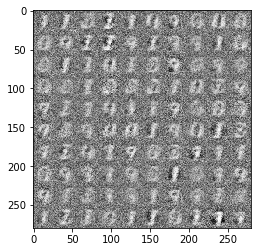

EPOCH 1 step 550: D: loss = 1.0637031 G: loss=0.9320828 
EPOCH 1 step 600: D: loss = 1.0761650 G: loss=0.9520736 
EPOCH 1 step 650: D: loss = 1.1535420 G: loss=0.9166665 
EPOCH 1 step 700: D: loss = 0.9872630 G: loss=1.0063394 
EPOCH 1 step 750: D: loss = 1.0038745 G: loss=0.9589288 
EPOCH 1 step 800: D: loss = 1.0528371 G: loss=0.9511709 
EPOCH 1 step 850: D: loss = 1.0502179 G: loss=0.9829048 
EPOCH 1 step 900: D: loss = 1.0007329 G: loss=1.0003920 
EPOCH 1 step 950: D: loss = 1.0119021 G: loss=1.0213171 
EPOCH 1 step 1000: D: loss = 0.9916114 G: loss=1.0175058 
EPOCH 1 step 1050: D: loss = 0.9797665 G: loss=1.0639465 


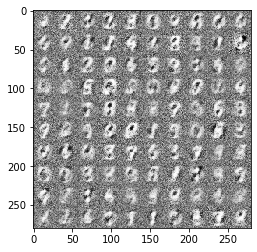

EPOCH 2 step 1100: D: loss = 0.9516032 G: loss=1.0607083 
EPOCH 2 step 1150: D: loss = 0.9976684 G: loss=1.0377780 
EPOCH 2 step 1200: D: loss = 0.9994757 G: loss=0.9865469 
EPOCH 2 step 1250: D: loss = 0.9031577 G: loss=1.1063523 
EPOCH 2 step 1300: D: loss = 0.9045864 G: loss=1.0984473 
EPOCH 2 step 1350: D: loss = 0.8435228 G: loss=1.1447184 
EPOCH 2 step 1400: D: loss = 0.8707576 G: loss=1.1141517 
EPOCH 2 step 1450: D: loss = 0.9137225 G: loss=1.0405022 
EPOCH 2 step 1500: D: loss = 0.9946619 G: loss=1.0280344 
EPOCH 2 step 1550: D: loss = 0.8857512 G: loss=1.1294420 
EPOCH 2 step 1600: D: loss = 0.8741727 G: loss=1.0976926 


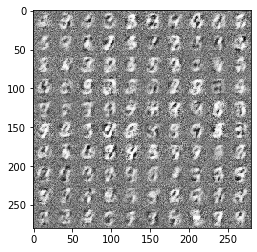

EPOCH 3 step 1650: D: loss = 0.9066105 G: loss=1.1165782 
EPOCH 3 step 1700: D: loss = 0.9314057 G: loss=1.0796552 
EPOCH 3 step 1750: D: loss = 0.9095197 G: loss=1.1151392 
EPOCH 3 step 1800: D: loss = 0.9690435 G: loss=1.0332775 
EPOCH 3 step 1850: D: loss = 0.9437618 G: loss=1.0977228 
EPOCH 3 step 1900: D: loss = 0.9263622 G: loss=1.1116669 
EPOCH 3 step 1950: D: loss = 0.9377868 G: loss=1.0605882 
EPOCH 3 step 2000: D: loss = 0.9564470 G: loss=1.0480336 
EPOCH 3 step 2050: D: loss = 0.9566865 G: loss=1.0062369 
EPOCH 3 step 2100: D: loss = 0.9510272 G: loss=0.9955941 
EPOCH 3 step 2150: D: loss = 0.9940122 G: loss=1.0016768 


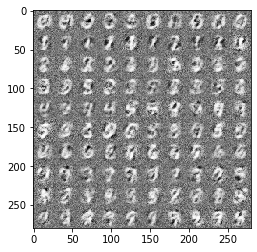

EPOCH 4 step 2200: D: loss = 0.9700146 G: loss=1.0325705 
EPOCH 4 step 2250: D: loss = 1.0317347 G: loss=0.9590454 
EPOCH 4 step 2300: D: loss = 1.0194750 G: loss=0.9626865 
EPOCH 4 step 2350: D: loss = 0.9974865 G: loss=1.0297316 
EPOCH 4 step 2400: D: loss = 1.0355268 G: loss=0.9826329 
EPOCH 4 step 2450: D: loss = 1.0344380 G: loss=0.9992568 
EPOCH 4 step 2500: D: loss = 1.0149560 G: loss=0.9778053 
EPOCH 4 step 2550: D: loss = 0.9965630 G: loss=0.9904530 
EPOCH 4 step 2600: D: loss = 0.9342089 G: loss=1.0485286 
EPOCH 4 step 2650: D: loss = 0.9803722 G: loss=1.0126431 
EPOCH 4 step 2700: D: loss = 0.9661215 G: loss=1.0220324 


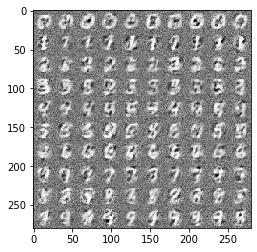

EPOCH 5 step 2750: D: loss = 0.9657800 G: loss=1.0707217 
EPOCH 5 step 2800: D: loss = 0.9441326 G: loss=1.0707854 
EPOCH 5 step 2850: D: loss = 0.8797840 G: loss=1.1376059 
EPOCH 5 step 2900: D: loss = 0.9784991 G: loss=1.0576564 
EPOCH 5 step 2950: D: loss = 0.9329454 G: loss=1.0642781 
EPOCH 5 step 3000: D: loss = 0.9239409 G: loss=1.1048608 
EPOCH 5 step 3050: D: loss = 0.9089779 G: loss=1.1065176 
EPOCH 5 step 3100: D: loss = 0.8721424 G: loss=1.1160698 
EPOCH 5 step 3150: D: loss = 0.8351476 G: loss=1.1950116 
EPOCH 5 step 3200: D: loss = 0.8782396 G: loss=1.0889671 
EPOCH 5 step 3250: D: loss = 0.8354053 G: loss=1.1371131 


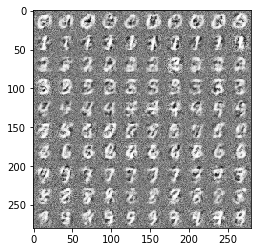

EPOCH 6 step 3300: D: loss = 0.8658095 G: loss=1.1193336 
EPOCH 6 step 3350: D: loss = 0.8444033 G: loss=1.1311259 
EPOCH 6 step 3400: D: loss = 0.7685781 G: loss=1.2786262 
EPOCH 6 step 3450: D: loss = 0.8301723 G: loss=1.2156286 
EPOCH 6 step 3500: D: loss = 0.8048681 G: loss=1.2605349 
EPOCH 6 step 3550: D: loss = 0.7980360 G: loss=1.2377480 
EPOCH 6 step 3600: D: loss = 0.8023342 G: loss=1.2439541 
EPOCH 6 step 3650: D: loss = 0.7572483 G: loss=1.2855468 
EPOCH 6 step 3700: D: loss = 0.7777301 G: loss=1.2350123 
EPOCH 6 step 3750: D: loss = 0.8131375 G: loss=1.3310392 
EPOCH 6 step 3800: D: loss = 0.7402482 G: loss=1.2034817 


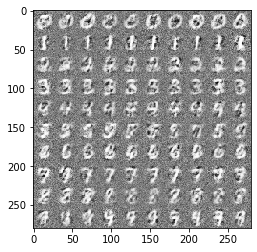

EPOCH 7 step 3850: D: loss = 0.7497290 G: loss=1.2873687 
EPOCH 7 step 3900: D: loss = 0.7415949 G: loss=1.2810771 
EPOCH 7 step 3950: D: loss = 0.6501364 G: loss=1.4726435 
EPOCH 7 step 4000: D: loss = 0.6798046 G: loss=1.5113796 
EPOCH 7 step 4050: D: loss = 0.7063988 G: loss=1.4777790 
EPOCH 7 step 4100: D: loss = 0.7088379 G: loss=1.3440796 
EPOCH 7 step 4150: D: loss = 0.6516460 G: loss=1.3248906 
EPOCH 7 step 4200: D: loss = 0.6651611 G: loss=1.3983563 
EPOCH 7 step 4250: D: loss = 0.6460176 G: loss=1.3129066 
EPOCH 7 step 4300: D: loss = 0.6248629 G: loss=1.4110878 
EPOCH 7 step 4350: D: loss = 0.6234671 G: loss=1.4944311 


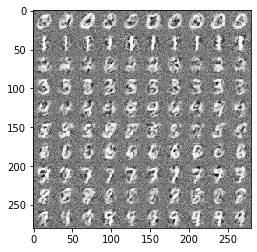

EPOCH 8 step 4400: D: loss = 0.6484517 G: loss=1.4448613 
EPOCH 8 step 4450: D: loss = 0.6235134 G: loss=1.4825290 
EPOCH 8 step 4500: D: loss = 0.5361995 G: loss=1.6942601 
EPOCH 8 step 4550: D: loss = 0.6125040 G: loss=1.5578136 
EPOCH 8 step 4600: D: loss = 0.6666795 G: loss=1.4759212 
EPOCH 8 step 4650: D: loss = 0.5628548 G: loss=1.6253603 
EPOCH 8 step 4700: D: loss = 0.5811896 G: loss=1.5230651 
EPOCH 8 step 4750: D: loss = 0.5868821 G: loss=1.5948157 
EPOCH 8 step 4800: D: loss = 0.6612516 G: loss=1.3841414 
EPOCH 8 step 4850: D: loss = 0.6392362 G: loss=1.5615146 
EPOCH 8 step 4900: D: loss = 0.6407323 G: loss=1.5936702 


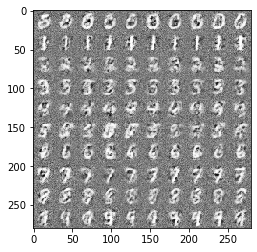

EPOCH 9 step 4950: D: loss = 0.5806175 G: loss=1.5488688 
EPOCH 9 step 5000: D: loss = 0.5748118 G: loss=1.6542968 
EPOCH 9 step 5050: D: loss = 0.6069646 G: loss=1.4899662 
EPOCH 9 step 5100: D: loss = 0.5933956 G: loss=1.4443119 
EPOCH 9 step 5150: D: loss = 0.6398971 G: loss=1.5647331 
EPOCH 9 step 5200: D: loss = 0.5500017 G: loss=1.7477618 
EPOCH 9 step 5250: D: loss = 0.5653291 G: loss=1.6663908 
EPOCH 9 step 5300: D: loss = 0.4819050 G: loss=1.7967122 
EPOCH 9 step 5350: D: loss = 0.5483352 G: loss=1.7384346 
EPOCH 9 step 5400: D: loss = 0.5974393 G: loss=1.6595190 
EPOCH 9 step 5450: D: loss = 0.5597696 G: loss=1.6309342 


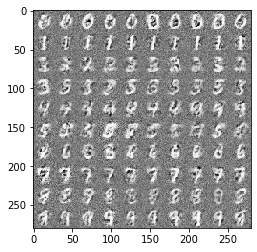

EPOCH 10 step 5500: D: loss = 0.5561166 G: loss=1.6554670 
EPOCH 10 step 5550: D: loss = 0.5698657 G: loss=1.7235731 
EPOCH 10 step 5600: D: loss = 0.4935656 G: loss=1.7545683 
EPOCH 10 step 5650: D: loss = 0.5712481 G: loss=1.6528397 
EPOCH 10 step 5700: D: loss = 0.5918505 G: loss=1.5290672 
EPOCH 10 step 5750: D: loss = 0.5943515 G: loss=1.5017058 
EPOCH 10 step 5800: D: loss = 0.5823317 G: loss=1.7783270 
EPOCH 10 step 5850: D: loss = 0.5851766 G: loss=1.4588814 
EPOCH 10 step 5900: D: loss = 0.5006371 G: loss=1.7926733 
EPOCH 10 step 5950: D: loss = 0.5393373 G: loss=1.6623133 
EPOCH 10 step 6000: D: loss = 0.4949706 G: loss=1.7223499 


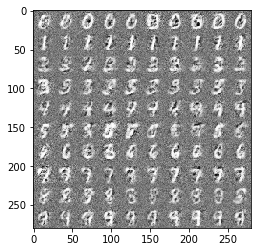

EPOCH 11 step 6050: D: loss = 0.4882793 G: loss=1.7714493 
EPOCH 11 step 6100: D: loss = 0.4837232 G: loss=1.7943687 
EPOCH 11 step 6150: D: loss = 0.5114337 G: loss=1.6314137 
EPOCH 11 step 6200: D: loss = 0.6005616 G: loss=1.6747499 
EPOCH 11 step 6250: D: loss = 0.4857357 G: loss=1.6816417 
EPOCH 11 step 6300: D: loss = 0.5500029 G: loss=1.8984392 
EPOCH 11 step 6350: D: loss = 0.5256447 G: loss=1.7600796 
EPOCH 11 step 6400: D: loss = 0.5492640 G: loss=1.7257843 
EPOCH 11 step 6450: D: loss = 0.6342894 G: loss=1.3341366 
EPOCH 11 step 6500: D: loss = 0.5468460 G: loss=1.5796185 
EPOCH 11 step 6550: D: loss = 0.4803282 G: loss=1.8456206 


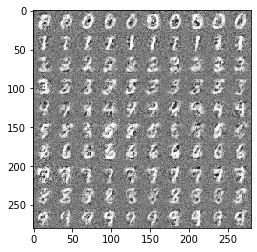

EPOCH 12 step 6600: D: loss = 0.4902588 G: loss=1.9442163 
EPOCH 12 step 6650: D: loss = 0.4864578 G: loss=1.9576231 
EPOCH 12 step 6700: D: loss = 0.4811569 G: loss=1.7204276 
EPOCH 12 step 6750: D: loss = 0.4966655 G: loss=1.8841629 
EPOCH 12 step 6800: D: loss = 0.4979495 G: loss=1.8466411 
EPOCH 12 step 6850: D: loss = 0.5023203 G: loss=1.6636654 
EPOCH 12 step 6900: D: loss = 0.5212219 G: loss=1.5411282 
EPOCH 12 step 6950: D: loss = 0.4691011 G: loss=1.7113819 
EPOCH 12 step 7000: D: loss = 0.5120294 G: loss=1.7736874 
EPOCH 12 step 7050: D: loss = 0.5344962 G: loss=1.5483227 


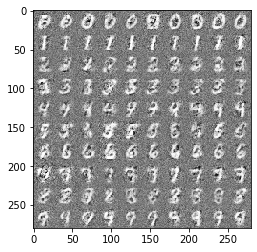

EPOCH 13 step 7100: D: loss = 0.4493077 G: loss=1.9606075 
EPOCH 13 step 7150: D: loss = 0.5391194 G: loss=1.7211072 
EPOCH 13 step 7200: D: loss = 0.5108851 G: loss=1.8290101 
EPOCH 13 step 7250: D: loss = 0.4952118 G: loss=1.8266540 
EPOCH 13 step 7300: D: loss = 0.4696270 G: loss=1.6915317 
EPOCH 13 step 7350: D: loss = 0.4761552 G: loss=1.8111383 
EPOCH 13 step 7400: D: loss = 0.5626105 G: loss=1.4654952 
EPOCH 13 step 7450: D: loss = 0.5085289 G: loss=1.4863858 
EPOCH 13 step 7500: D: loss = 0.4807974 G: loss=1.8354250 
EPOCH 13 step 7550: D: loss = 0.5295713 G: loss=1.7562540 
EPOCH 13 step 7600: D: loss = 0.4642895 G: loss=1.8237512 


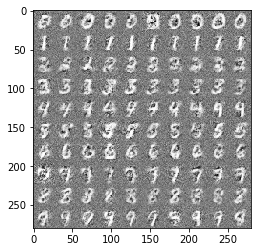

EPOCH 14 step 7650: D: loss = 0.4514620 G: loss=1.9251518 
EPOCH 14 step 7700: D: loss = 0.4717919 G: loss=1.7162637 
EPOCH 14 step 7750: D: loss = 0.4868698 G: loss=1.7219560 
EPOCH 14 step 7800: D: loss = 0.4373313 G: loss=1.9600658 
EPOCH 14 step 7850: D: loss = 0.5942368 G: loss=1.6054899 
EPOCH 14 step 7900: D: loss = 0.4902641 G: loss=1.7215762 
EPOCH 14 step 7950: D: loss = 0.4419147 G: loss=1.9216835 
EPOCH 14 step 8000: D: loss = 0.4338292 G: loss=1.8586338 
EPOCH 14 step 8050: D: loss = 0.4683317 G: loss=1.8598654 
EPOCH 14 step 8100: D: loss = 0.4930999 G: loss=2.0332170 
EPOCH 14 step 8150: D: loss = 0.4634682 G: loss=1.8671451 


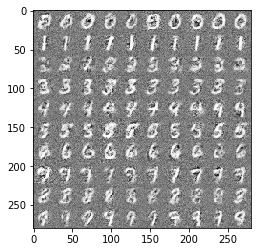

EPOCH 15 step 8200: D: loss = 0.4212574 G: loss=2.1217642 
EPOCH 15 step 8250: D: loss = 0.4427125 G: loss=1.7651912 
EPOCH 15 step 8300: D: loss = 0.4590086 G: loss=1.7050641 
EPOCH 15 step 8350: D: loss = 0.4517713 G: loss=1.8004520 
EPOCH 15 step 8400: D: loss = 0.4659700 G: loss=1.6430759 
EPOCH 15 step 8450: D: loss = 0.4599539 G: loss=1.8124111 
EPOCH 15 step 8500: D: loss = 0.5053114 G: loss=1.6972258 
EPOCH 15 step 8550: D: loss = 0.4239634 G: loss=1.8141358 
EPOCH 15 step 8600: D: loss = 0.5323042 G: loss=1.8410776 
EPOCH 15 step 8650: D: loss = 0.5278969 G: loss=1.5692693 
EPOCH 15 step 8700: D: loss = 0.4349762 G: loss=1.8589985 


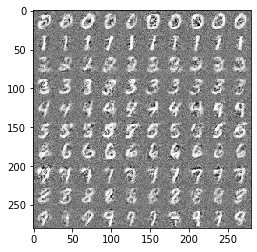

EPOCH 16 step 8750: D: loss = 0.4733554 G: loss=1.7377484 
EPOCH 16 step 8800: D: loss = 0.4870683 G: loss=1.8356965 
EPOCH 16 step 8850: D: loss = 0.4260477 G: loss=1.9122434 
EPOCH 16 step 8900: D: loss = 0.5220892 G: loss=1.4929233 
EPOCH 16 step 8950: D: loss = 0.5032327 G: loss=1.5539012 
EPOCH 16 step 9000: D: loss = 0.4815474 G: loss=1.7014892 
EPOCH 16 step 9050: D: loss = 0.4469006 G: loss=2.0142686 
EPOCH 16 step 9100: D: loss = 0.4098023 G: loss=2.0089393 
EPOCH 16 step 9150: D: loss = 0.4689971 G: loss=1.9436710 
EPOCH 16 step 9200: D: loss = 0.4660459 G: loss=2.0556018 
EPOCH 16 step 9250: D: loss = 0.4220626 G: loss=2.0099292 


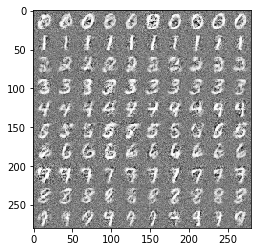

EPOCH 17 step 9300: D: loss = 0.4795424 G: loss=1.8732479 
EPOCH 17 step 9350: D: loss = 0.4419015 G: loss=1.8050385 
EPOCH 17 step 9400: D: loss = 0.4591243 G: loss=1.9026004 
EPOCH 17 step 9450: D: loss = 0.3871460 G: loss=2.0456865 
EPOCH 17 step 9500: D: loss = 0.5409061 G: loss=1.5425789 
EPOCH 17 step 9550: D: loss = 0.4399967 G: loss=1.8694491 
EPOCH 17 step 9600: D: loss = 0.4574535 G: loss=1.8481609 
EPOCH 17 step 9650: D: loss = 0.4534327 G: loss=1.9011338 
EPOCH 17 step 9700: D: loss = 0.4633906 G: loss=1.4930997 
EPOCH 17 step 9750: D: loss = 0.4506040 G: loss=1.8524380 
EPOCH 17 step 9800: D: loss = 0.4692801 G: loss=1.8033676 


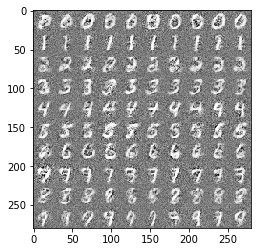

EPOCH 18 step 9850: D: loss = 0.4878615 G: loss=1.7493963 
EPOCH 18 step 9900: D: loss = 0.4421088 G: loss=1.8421714 
EPOCH 18 step 9950: D: loss = 0.4574499 G: loss=1.8879520 
EPOCH 18 step 10000: D: loss = 0.4512769 G: loss=1.8223202 
EPOCH 18 step 10050: D: loss = 0.4499337 G: loss=2.0597837 
EPOCH 18 step 10100: D: loss = 0.4574462 G: loss=2.2408979 
EPOCH 18 step 10150: D: loss = 0.4894438 G: loss=1.9472086 
EPOCH 18 step 10200: D: loss = 0.4345784 G: loss=2.1300120 
EPOCH 18 step 10250: D: loss = 0.5081220 G: loss=1.6185772 
EPOCH 18 step 10300: D: loss = 0.4446959 G: loss=2.1761229 
EPOCH 18 step 10350: D: loss = 0.4446961 G: loss=2.0689893 


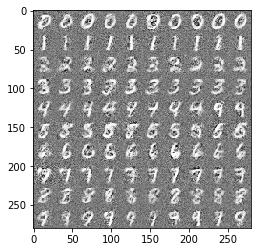

EPOCH 19 step 10400: D: loss = 0.4222224 G: loss=1.7722623 
EPOCH 19 step 10450: D: loss = 0.4138974 G: loss=1.8988773 
EPOCH 19 step 10500: D: loss = 0.4351549 G: loss=1.9189485 
EPOCH 19 step 10550: D: loss = 0.4182296 G: loss=2.0560892 
EPOCH 19 step 10600: D: loss = 0.4761406 G: loss=2.1524248 
EPOCH 19 step 10650: D: loss = 0.4277060 G: loss=1.8344011 
EPOCH 19 step 10700: D: loss = 0.3992335 G: loss=1.8641636 
EPOCH 19 step 10750: D: loss = 0.4676600 G: loss=1.5576718 
EPOCH 19 step 10800: D: loss = 0.4369874 G: loss=1.8605676 
EPOCH 19 step 10850: D: loss = 0.3744250 G: loss=2.1559129 
EPOCH 19 step 10900: D: loss = 0.4239366 G: loss=2.2471805 


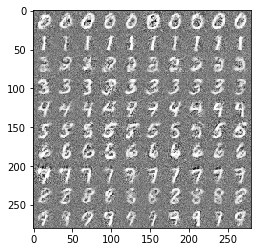

EPOCH 20 step 10950: D: loss = 0.3998291 G: loss=2.0734608 
EPOCH 20 step 11000: D: loss = 0.4066569 G: loss=2.1390755 
EPOCH 20 step 11050: D: loss = 0.4236310 G: loss=2.2505188 
EPOCH 20 step 11100: D: loss = 0.4388263 G: loss=2.1049423 
EPOCH 20 step 11150: D: loss = 0.4780990 G: loss=1.8383644 
EPOCH 20 step 11200: D: loss = 0.4650264 G: loss=1.7442299 
EPOCH 20 step 11250: D: loss = 0.3733483 G: loss=2.0226324 
EPOCH 20 step 11300: D: loss = 0.4007606 G: loss=1.8746033 
EPOCH 20 step 11350: D: loss = 0.3514436 G: loss=2.0575156 
EPOCH 20 step 11400: D: loss = 0.4164452 G: loss=2.0699544 
EPOCH 20 step 11450: D: loss = 0.4611384 G: loss=2.0685029 


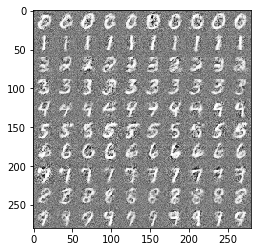

In [10]:
tf.reset_default_graph()
sample_z = np.random.uniform(-1 , 1 , size = [batch_size , sample_size])

y = tf.placeholder(tf.float32, [None , y_dim])

images = tf.placeholder(tf.float32, [batch_size, output_size, output_size, channel])

z = tf.placeholder(tf.float32, [None , sample_size])

fake_images = gern_net(batch_size, z , y ,sample_size, y_dim,output_size)

##the loss of gerenate network
D_pro , D_logits = dis_net(images, y ,  False)

G_pro, G_logits = dis_net(fake_images , y , True)

#### TODO ####
# DEFINE LOSS FUNCTION #
D_fake_loss = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.zeros_like(G_pro), logits=G_logits))
D_real_loss = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(D_pro), logits=D_logits))
G_fake_loss = tf.reduce_mean(
            tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(G_pro), logits=G_logits))

D_loss = D_fake_loss + D_real_loss
G_loss = G_fake_loss

#############

t_vars = tf.trainable_variables()

d_var = [var for var in t_vars if 'dis' in var.name]
g_var = [var for var in t_vars if 'gen' in var.name]

opti_D = tf.train.AdamOptimizer(learning_rate=learning_rate , beta1=0.5).minimize(D_loss , var_list=d_var)
opti_G = tf.train.AdamOptimizer(learning_rate=learning_rate , beta1=0.5).minimize(G_loss , var_list=g_var)

init = tf.global_variables_initializer()
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

with tf.Session(config=config) as sess:

    sess.run(init)
    e = 0
    step = 0

    while e <= EPOCH:
        batch_num = 0
        while batch_num < len(data_array) / batch_size - 1:

            step = step + 1

            realbatch_array , real_labels = getNext_batch(data_array , data_y , batch_num, batch_size)
            
            #Get the z
            batch_z = np.random.uniform(-1 , 1 , size=[batch_size , sample_size])

            _ = sess.run(opti_D, feed_dict={images:realbatch_array, z:batch_z , y:real_labels})
            _ = sess.run(opti_G, feed_dict={z: batch_z , y:real_labels})

            batch_num += 1

            if step % loss_step == 0:

                d_get_loss = sess.run(D_loss , feed_dict = {images:realbatch_array , z:batch_z , y:real_labels})
                g_get_loss = sess.run(G_loss , feed_dict = {z: batch_z , y:real_labels})
                print("EPOCH %d step %d: D: loss = %.7f G: loss=%.7f " % (e , step , d_get_loss , g_get_loss))

            if np.mod(step , display_step) == 1:

                sample_images = sess.run(fake_images , feed_dict={z:sample_z , y:sample_label(batch_size)})
                sample_images = sample_images[:100,:,:,:]
                image_name = './{}/train_{:02d}_{:04d}.png'.format(sample_dir , e , step)
                save_images(sample_images , [10,10] , image_name)

        img = mpimg.imread(image_name)
        imgplot = plt.imshow(img)
        plt.show()

        e = e + 1
        batch_num = 0
